In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import pyabf
# !pip3 install

In [3]:
with open("binwvsrin_old.pkl", "rb") as f:
    binwvsrin_old = pickle.load(f)
with open("bnwvsrin_new.pkl", "rb") as f:
    binwvsrin_new = pickle.load(f)
with open("binwvsrin_oldNaNs.pkl", "rb") as f:
    binwvsrin_oldNaNs = pickle.load(f)
with open("binwvsrin_newNaNs.pkl", "rb") as f:
    binwvsrin_newNaNs = pickle.load(f)

binwvsrin = {}
binwvsrin = binwvsrin_old | binwvsrin_new
binwvsrinNANs = {}
binwvsrinNaNs = binwvsrin_oldNaNs | binwvsrin_newNaNs


In [4]:
list(binwvsrinNaNs.keys())[:5]

[(np.float64(25.233409033558843),
  'Excitatory',
  'CaP',
  '2013_03_21_cell5',
  np.float64(33.0)),
 (np.float64(32.61578604044627),
  'Excitatory',
  'CaP',
  '2013_03_21_cell5',
  np.float64(33.0)),
 (np.float64(36.50967506389131),
  'Excitatory',
  'CaP',
  '2013_03_21_cell5',
  np.float64(33.0)),
 (np.float64(26.212319790300285),
  'Excitatory',
  'CaP',
  '2013_03_21_cell5',
  np.float64(33.0)),
 (np.float64(22.836263987212853),
  'Excitatory',
  'CaP',
  '2013_03_21_cell5',
  np.float64(33.0))]

In [9]:
list(binwvsrin_new.keys())[:5]

[(np.float64(70.57163020465765),
  'Inhibitory (Rs compensation)',
  'CaP',
  'primary'),
 (np.float64(37.13330857779412),
  'Inhibitory (Rs compensation)',
  'CaP',
  'primary'),
 (np.float64(29.629629629631626),
  'Inhibitory (Rs compensation)',
  'CaP',
  'primary'),
 (np.float64(25.393600812594386),
  'Inhibitory (Rs compensation)',
  'CaP',
  'primary'),
 (np.float64(26.773761713520752),
  'Inhibitory (Rs compensation)',
  'CaP',
  'primary')]

In [5]:
from collections import Counter
def get_freq_bin(freq):
    if 15 <= freq < 25:
        return "15–25"
    elif 25 <= freq < 35:
        return "25–35"
    elif 35 <= freq < 45:
        return "35–45"
    elif 45 <= freq < 75:
        return "45+"
def get_slowfast(freq):
    if 20 <= freq < 30:
        return "20-30"
    elif 30 <= freq < 40:
        return "30-40"
        
def group_iSMN(cell_type):
    if cell_type in ["iSMN (dorsal) muscle", "iSMN"]:
        return "iSMN"
    elif cell_type in ['vSMN ','vSMN']:
        return 'vSMN'
    return cell_type

def group_EI(signal_type):
    if signal_type in ["Inhibitory", "Inhibitory (Rs compensation)"]:
        return "Inhibitory"
    if signal_type in ["Excitatory", "Excitatory (Rs compensation)"]:
        return "Excitatory"
    return signal_type

key_counts_all = Counter()

for freq, signal_type, cell_type, cell, rin in binwvsrin_oldNaNs.keys():
    freq_bin = get_freq_bin(freq)
    cell_type_gen = group_iSMN(cell_type)
    signal_type_gen = group_EI(signal_type)
    grouped_key = (freq_bin, signal_type_gen, cell_type_gen, cell, rin)
    key_counts_all[grouped_key] += 1

In [6]:
key_counts_all

Counter({('15–25',
          'Cell-attached',
          'MiP',
          '2013_03_21_cell4',
          np.float64(47.15)): 681,
         ('25–35',
          'Excitatory',
          'vRoP',
          '2012_08_31_cell2',
          np.float64(44.77)): 621,
         ('25–35',
          'Cell-attached',
          'vRoP',
          '2012_08_31_cell2',
          np.float64(44.77)): 502,
         ('15–25',
          'Cell-attached',
          'CaP',
          '2013_03_22_cell2',
          np.float64(43.64)): 427,
         ('25–35',
          'Inhibitory',
          'dSMN',
          '2012_08_31_cell4',
          np.float64(242.57)): 417,
         ('15–25',
          'Cell-attached',
          'iSMN',
          '2012_12_06_cell4',
          np.float64(861.9)): 320,
         ('25–35',
          'Cell-attached',
          'MiP',
          '2013_03_21_cell4',
          np.float64(47.15)): 284,
         ('25–35',
          'Cell-attached',
          'dRoP',
          '2013_03_22_cell4',
          n

In [17]:
cell_types_df = pd.read_csv("/Users/Haley/Desktop/murray-neuroscience-lab/Excel processor/List of cells.csv")
cell_types_df = cell_types_df.dropna(how='all')
cell_types_df = cell_types_df.iloc[:,:4]
cell_types_df.reset_index(drop=True,inplace=True)
def grouprins(cell):
    types = cell_types_df[cell_types_df["Cell"]==cell]

    return types.iloc[0][3]

In [21]:
fast_slow

'primary'

In [22]:
grouped = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for key, df in binwvsrinNaNs.items():
    if df.shape != (50, 4):
        continue
    freq, signal_type, cell_type, cell, rin = key
    freq_bin = get_freq_bin(freq)
    signal_type = group_EI(signal_type)
    cell_type = group_iSMN(cell_type)
    fast_slow = grouprins(cell)
    grouped[freq_bin][signal_type][cell_type].append(df.copy())

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/3479932654.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return types.iloc[0][3]


In [ ]:
import matplotlib.cm as cm

# Frequency bins and swimming speed categories
freq_bins = ["15–25", "25–35", "35–45", "45+"]
speed_categories = ["primary", "Low Rin Secondary ", "High Rin Secondary"]
signal_types = ["Inhibitory", "Excitatory"]

# Assign unique colors to signal types
cmap = cm.get_cmap('tab10', len(signal_types))
signal_type_colors = {stype: cmap(i) for i, stype in enumerate(sorted(signal_types))}

# Create 3x4 subplots: rows = swimming speeds, columns = frequency bins
fig, axes = plt.subplots(len(speed_categories), len(freq_bins), figsize=(20, 12), sharex=True, sharey=True)

# Track which labels have been used to avoid duplicates in the legend
used_labels = set()
count = 0
# Loop through each combination of speed and frequency bin
for i, speed in enumerate(speed_categories):
    for j, freq_bin in enumerate(freq_bins):
        ax = axes[i, j]

        for signal_type in signal_types:
            # Construct the key without cell type
            matching_keys = [key for key in binned_waveforms.keys()
                             if get_freq_bin(key[0]) == freq_bin and
                                key[1] == signal_type and
                                key[3] == speed]
            dfs = [binned_waveforms[key].copy() for key in matching_keys]
            if not dfs:
                continue
            count += 1
            combined = pd.concat(dfs)
            grouped = combined.groupby('Phase Bin', observed=False)
            averaged = grouped.mean().reset_index()
            sem = grouped.sem().reset_index()

            label = signal_type if signal_type not in used_labels else None
            ax.plot(averaged['Phase'], averaged['Normalized Current'],
                    label=label, color=signal_type_colors[signal_type])
            ax.fill_between(averaged['Phase'],
                            averaged['Normalized Current'] - sem['Normalized Current'],
                            averaged['Normalized Current'] + sem['Normalized Current'],
                            color=signal_type_colors[signal_type], alpha=0.3)
            used_labels.add(signal_type)

        # Add subplot title and labels
        if i == 0:
            ax.set_title(f"{freq_bin} Hz")
        if j == 0:
            ax.set_ylabel(f"{speed}\nNormalized Current")
        if i == len(speed_categories) - 1:
            ax.set_xlabel("Phase")

# Finalize layout and add legend to the figure
handles, labels = [], []
for stype in signal_types:
    handles.append(plt.Line2D([0], [0], color=signal_type_colors[stype]))
    labels.append(stype)
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Averaged Waveforms by Swimming Frequency and Rin Class", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from collections import defaultdict, Counter

# --- Binning frequency ---
def get_freq_bin(freq):
    if freq < 15:
        return "<15"
    elif 15 <= freq < 25:
        return "15–25"
    elif 25 <= freq < 35:
        return "25–35"
    elif 35 <= freq < 45:
        return "35–45"
    else:
        return "45+"


# --- Grouping iSMN / vSMN cell types ---
def group_iSMN(cell_type):
    cell_type = cell_type.strip()
    if cell_type in ["iSMN (dorsal) muscle", "iSMN"]:
        return "iSMN"
    if cell_type == "vSMN":
        return "vSMN"
    return cell_type

# --- Grouping Excitatory/Inhibitory signal types ---
def group_EI(signal_type):
    if signal_type in ["Inhibitory", "Inhibitory (Rs compensation)"]:
        return "Inhibitory"
    if signal_type in ["Excitatory", "Excitatory (Rs compensation)"]:
        return "Excitatory"
    return signal_type

# --- Grouping cell into rin group ---
cell_types_df = pd.read_csv("/Users/Haley/Desktop/murray-neuroscience-lab/Excel processor/List of cells.csv")
cell_types_df = cell_types_df.dropna(how='all')
cell_types_df = cell_types_df.iloc[:,:4]
cell_types_df.reset_index(drop=True,inplace=True)
def grouprins(cell):
    types = cell_types_df[cell_types_df["Cell"]==cell]

    return types.iloc[0][3]

# --- Average and SEM across waveforms ---
def average_waveforms_for_keylist(waveforms):
    """Returns DataFrame with Phase, Mean, and SEM from list of waveforms, ignoring NaNs."""
    phase = np.arange(0.01, 1.00001, 0.02)
    combined = pd.concat(waveforms).copy()
    combined['Phase'] = np.tile(phase, len(waveforms))
    combined = combined.dropna(subset=['Normalized Current'])  # <- Ignores NaNs
    grouped = combined.groupby('Phase')['Normalized Current']
    mean = grouped.mean().reset_index(name='Mean')
    sem = grouped.sem().reset_index(name='SEM')
    return pd.merge(mean, sem, on='Phase')


In [12]:

# --- Plotting grouped waveforms ---
def plot_all_waveforms_by_signal_type(binned_waveforms):
    from matplotlib.lines import Line2D

    # Group using all 5 keys: freq_bin, signal_type, grouped_cell_type, cell, rin
    grouped = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
    for key, df in binned_waveforms.items():
        if df.shape != (50, 4):
            continue
        freq, signal_type, cell_type, cell_id, rin = key
        freq_bin = get_freq_bin(freq)
        signal_type_grouped = group_EI(signal_type)
        cell_type_grouped = group_iSMN(cell_type)
        cell_id_grouped = grouprins(cell_id)
        grouped[freq_bin][signal_type_grouped][cell_type_grouped][cell_id_grouped].append(df.copy())
    
    # Define custom bin order
    freq_bin_order = ["<15", "15–25", "25–35", "35–45", "45+"]

    # Assign unique color per grouped_cell_type
    all_cell_types = sorted({group_iSMN(k[2]) for k in binned_waveforms})
    cmap = cm.get_cmap('tab20', len(all_cell_types))
    cell_type_colors = {ctype: cmap(i) for i, ctype in enumerate(all_cell_types)}

    for cell_id in ["primary", "Low Rin Secondary ","High Rin Secondary"]:

        for signal_type in ["Excitatory", "Inhibitory"]:
            fig, axes = plt.subplots(3, len(freq_bin_order), figsize=(20, 5), sharey=True)
            if len(freq_bin_order) == 1:
                axes = [axes]

            for j, freq_bin in enumerate(freq_bin_order):
                ax = axes[j]
                if freq_bin not in grouped:
                    ax.set_visible(False)
                    continue
                for cell_type in grouped[freq_bin][signal_type]:
                    waveforms = grouped[freq_bin][signal_type][cell_type]
                    if not waveforms:
                        continue
                    
                    avg_df = average_waveforms_for_keylist(waveforms)
                    ax.plot(avg_df['Phase'], avg_df['Mean'], label=cell_type, color=cell_type_colors[cell_type])
                    ax.fill_between(avg_df['Phase'], avg_df['Mean'] - avg_df['SEM'], avg_df['Mean'] + avg_df['SEM'],
                                    color=cell_type_colors[cell_type], alpha=0.3)
                ax.set_title(f"{freq_bin} Hz")
                ax.set_xlabel("Phase")
                if j == 0:
                    ax.set_ylabel("Normalized Current")

            fig.suptitle(f"{signal_type} Waveforms by Cell Type and Frequency Bin", fontsize=16)
            fig.legend(handles=[Line2D([0], [0], color=cell_type_colors[ct], label=ct) for ct in all_cell_types],
                    loc='upper right', fontsize='small')
            plt.tight_layout(rect=[0, 0, 0.95, 0.95])
            plt.show()

plot_all_waveforms_by_signal_type(binwvsrinNaNs)


/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/2642446244.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return types.iloc[0][3]


TypeError: list indices must be integers or slices, not str

/var/folders/40/qf3btjqs32l1pmzzyts7w9pmh2xrdg/T/ipykernel_70263/193316124.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(unique_cell_types))


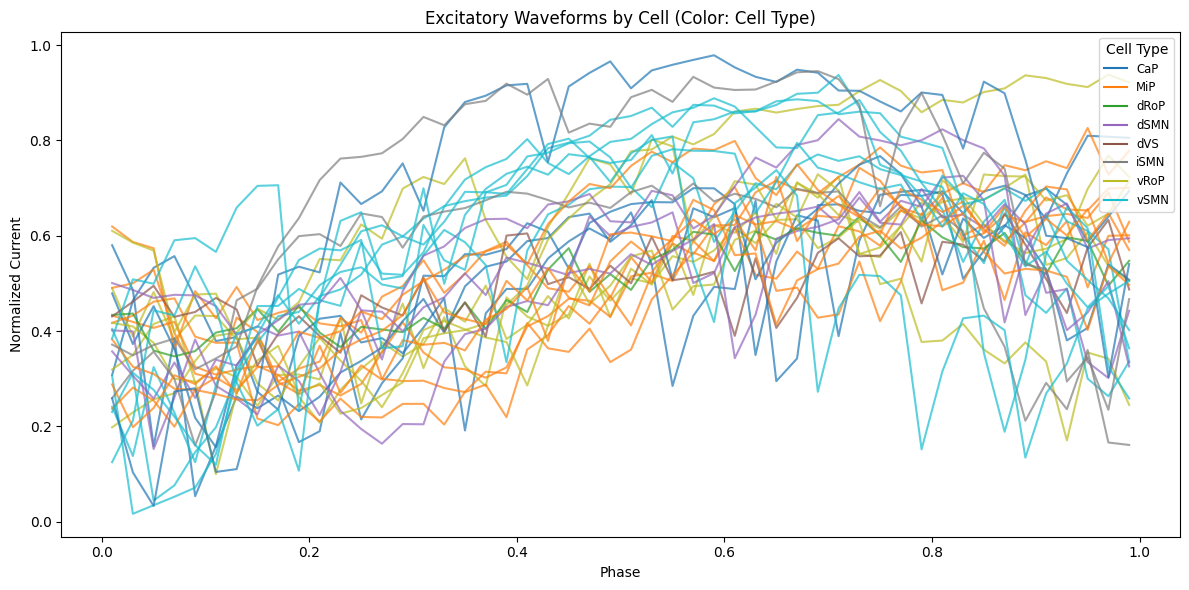

In [13]:
def plot_waveforms_by_cell(binned_waveforms, signal_filter="Excitatory"):
    from matplotlib.lines import Line2D

    # Organize data: [cell] = (cell_type, waveform)
    cell_to_data = {}

    for key, df in binned_waveforms.items():
        if df.shape != (50, 4):
            continue
        freq, signal_type, cell_type, cell, rin = key
        if group_EI(signal_type) != signal_filter:
            continue
        cell_type_grouped = group_iSMN(cell_type)
        cell_to_data[cell] = (cell_type_grouped, df.copy())

    # Unique cell types for colormap
    unique_cell_types = sorted({val[0] for val in cell_to_data.values()})
    cmap = cm.get_cmap("tab10", len(unique_cell_types))
    cell_type_colors = {ct: cmap(i) for i, ct in enumerate(unique_cell_types)}

    fig, ax = plt.subplots(figsize=(12, 6))
    for cell, (cell_type, df) in cell_to_data.items():
        if "Normalized Current" not in df.columns:
            continue
        avg_df = average_waveforms_for_keylist([df])
        ax.plot(avg_df['Phase'], avg_df['Mean'], label=cell, color=cell_type_colors[cell_type], alpha=0.7)

    ax.set_title(f"{signal_filter} Waveforms by Cell (Color: Cell Type)")
    ax.set_xlabel("Phase")
    ax.set_ylabel("Normalized Current")

    # Make custom legend for cell type color groups
    handles = [Line2D([0], [0], color=cell_type_colors[ct], label=ct) for ct in unique_cell_types]
    ax.legend(handles=handles, title="Cell Type", loc="upper right", fontsize="small")
    plt.tight_layout()
    plt.show()
plot_waveforms_by_cell(binwvsrinNaNs, signal_filter="Excitatory")


/var/folders/40/qf3btjqs32l1pmzzyts7w9pmh2xrdg/T/ipykernel_70263/3308089954.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(sorted_cell_types))


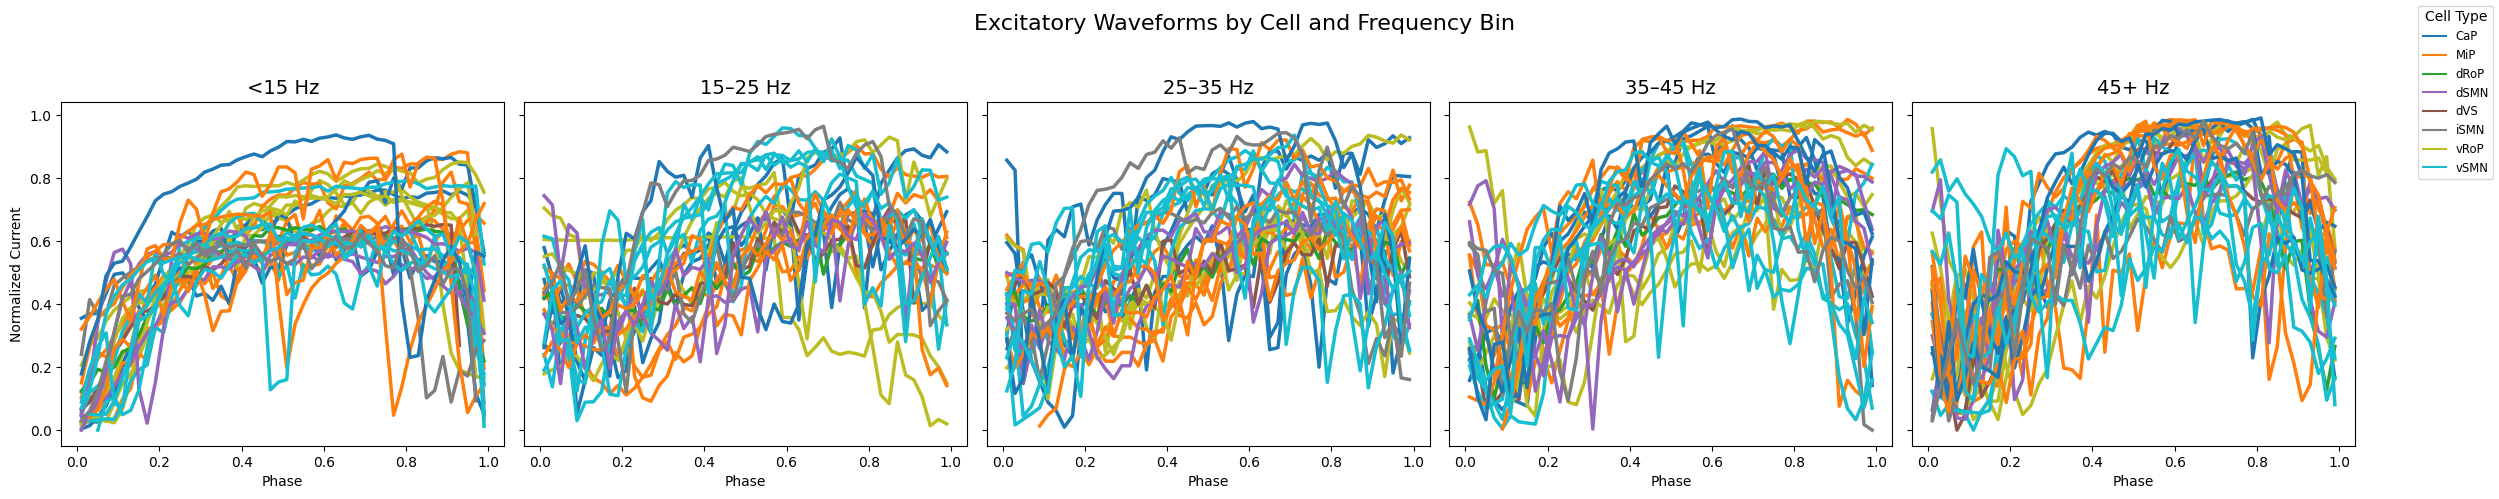

In [14]:
def plot_waveforms_by_cell_grouped(
    binned_waveforms,
    signal_filter="Excitatory",
    show_sem=True,
    highlight_high_rin=True,
    rin_threshold=1.0
):
    from matplotlib.lines import Line2D
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import pandas as pd
    from collections import defaultdict

    # Organize data: [freq_bin][cell] = (cell_type, df, rin)
    grouped = defaultdict(dict)
    all_cell_types = set()

    for key, df in binned_waveforms.items():
        if df.shape != (50, 4):
            continue
        freq, signal_type, cell_type, cell, rin = key
        if group_EI(signal_type) != signal_filter:
            continue
        freq_bin = get_freq_bin(freq)
        cell_type_grouped = group_iSMN(cell_type)
        all_cell_types.add(cell_type_grouped)
        grouped[freq_bin][cell] = (cell_type_grouped, df.copy(), rin)

    # Set color per cell type
    sorted_cell_types = sorted(all_cell_types)
    cmap = cm.get_cmap("tab10", len(sorted_cell_types))
    cell_type_colors = {ct: cmap(i) for i, ct in enumerate(sorted_cell_types)}

    # Plot setup
    freq_bins_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    n_bins = sum([bin in grouped for bin in freq_bins_order])
    fig, axes = plt.subplots(1, n_bins, figsize=(5 * n_bins, 5), sharey=True)
    if n_bins == 1:
        axes = [axes]

    for idx, freq_bin in enumerate(freq_bins_order):
        if freq_bin not in grouped:
            continue
        ax = axes[idx]
        cells = grouped[freq_bin]

        for cell, (cell_type, df, rin) in cells.items():
            avg_df = average_waveforms_for_keylist([df])
            color = cell_type_colors[cell_type]
            label = f"{cell} ({cell_type})"
            lw = 2.5 if (highlight_high_rin and rin and rin > rin_threshold) else 1.5
            alpha = 1.0 if (highlight_high_rin and rin and rin > rin_threshold) else 0.7

            ax.plot(avg_df['Phase'], avg_df['Mean'], label=label, color=color, linewidth=lw, alpha=alpha)

            if show_sem:
                ax.fill_between(avg_df['Phase'],
                                avg_df['Mean'] - avg_df['SEM'],
                                avg_df['Mean'] + avg_df['SEM'],
                                color=color, alpha=0.2)

        ax.set_title(f"{freq_bin} Hz", fontsize=14)
        ax.set_xlabel("Phase")
        if idx == 0:
            ax.set_ylabel("Normalized Current")

    fig.suptitle(f"{signal_filter} Waveforms by Cell and Frequency Bin", fontsize=16)

    # Legend: one handle per cell type
    handles = [Line2D([0], [0], color=cell_type_colors[ct], label=ct) for ct in sorted_cell_types]
    fig.legend(handles=handles, title="Cell Type", loc='upper right', fontsize='small')
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.show()

plot_waveforms_by_cell_grouped(binwvsrinNaNs)


In [15]:
def calculate_variance_by_cell_and_freqbin(binned_waveforms, signal_filter=None):
    """
    Computes variance of normalized current across the phase cycle for each cell and frequency bin.
    
    Parameters:
        binned_waveforms: dict
            Keys are 5-tuples (freq, signal_type, cell_type, cell_id, Rin)
            Values are DataFrames with 50 rows, including 'Normalized Current'
        signal_filter: str or None
            If "Excitatory" or "Inhibitory", filters by signal type group
    
    Returns:
        DataFrame with columns: ['Cell', 'Cell Type', 'Freq Bin', 'Variance', 'Signal Type']
    """
    data = []

    for key, df in binned_waveforms.items():
        if df.shape != (50, 4):
            continue
        freq, signal_type, cell_type, cell, rin = key
        grouped_signal = group_EI(signal_type)
        if signal_filter and grouped_signal != signal_filter:
            continue
        freq_bin = get_freq_bin(freq)
        cell_type_grouped = group_iSMN(cell_type)

        var = df['Normalized Current'].var(skipna=True)
        data.append({
            'Cell': cell,
            'Cell Type': cell_type_grouped,
            'Freq Bin': freq_bin,
            'Variance': var,
            'Signal Type': grouped_signal
        })

    return pd.DataFrame(data)
# All signal types
variance_df = calculate_variance_by_cell_and_freqbin(binwvsrinNaNs)

# Just excitatory
excitatory_var = calculate_variance_by_cell_and_freqbin(binwvsrinNaNs, signal_filter="Excitatory")

# Summary: mean variance per frequency bin and signal type
variance_summary = variance_df.groupby(['Freq Bin', 'Signal Type'])['Variance'].mean().reset_index()


In [16]:
variance_summary

Freq Bin    Signal Type  Variance
0     15–25  Cell-attached  0.003186
1     15–25     Excitatory  0.028374
2     15–25     Inhibitory  0.046664
3     25–35  Cell-attached  0.006142
4     25–35     Excitatory  0.032535
5     25–35     Inhibitory  0.045755
6     35–45  Cell-attached  0.009502
7     35–45     Excitatory  0.050590
8     35–45     Inhibitory  0.058952
9       45+  Cell-attached  0.013502
10      45+     Excitatory  0.055830
11      45+     Inhibitory  0.062408
12      <15  Cell-attached  0.003455
13      <15     Excitatory  0.028962
14      <15     Inhibitory  0.023336

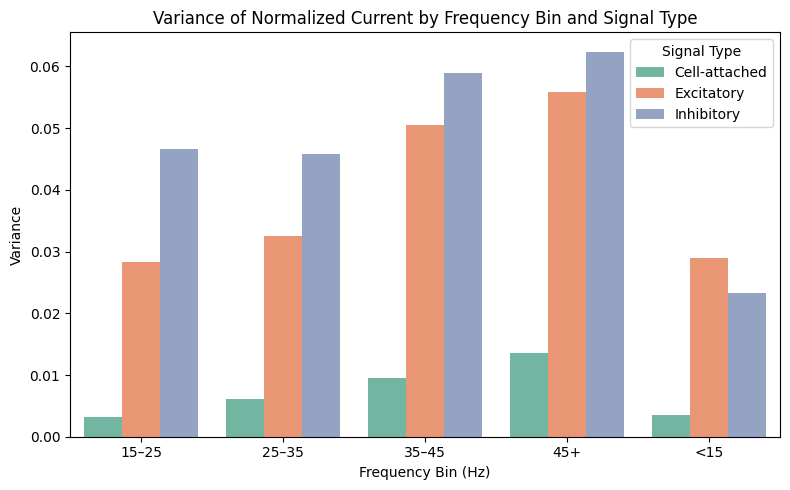

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=variance_summary, x='Freq Bin', y='Variance', hue='Signal Type', palette='Set2')

plt.title("Variance of Normalized Current by Frequency Bin and Signal Type")
plt.ylabel("Variance")
plt.xlabel("Frequency Bin (Hz)")
plt.legend(title="Signal Type")
plt.tight_layout()
plt.show()

In [18]:
def calculate_variance_per_cell_instance(binned_waveforms, signal_filter=None):
    """
    Computes the variance of normalized current across the phase cycle 
    for each (cell, frequency bin) instance.

    Parameters:
        binned_waveforms: dict
            Keys are 5-tuples: (freq, signal_type, cell_type, cell_id, Rin)
            Values are DataFrames with waveform data.
        signal_filter: str or None
            If specified ("Excitatory" or "Inhibitory"), filters signal types.

    Returns:
        DataFrame with columns:
        ['Cell', 'Cell Type', 'Freq Bin', 'Variance', 'Signal Type', 'Freq', 'Rin']
    """
    results = []

    for key, df in binned_waveforms.items():
        if df.shape != (50, 4):
            continue

        freq, signal_type, cell_type, cell, rin = key
        grouped_signal = group_EI(signal_type)
        if signal_filter and grouped_signal != signal_filter:
            continue

        freq_bin = get_freq_bin(freq)
        cell_type_grouped = group_iSMN(cell_type)

        var = df['Normalized Current'].var(skipna=True)

        results.append({
            'Cell': cell,
            'Cell Type': cell_type_grouped,
            'Freq Bin': freq_bin,
            'Freq': freq,
            'Rin': rin,
            'Variance': var,
            'Signal Type': grouped_signal
        })

    return pd.DataFrame(results)
# Full variance data by cell instance
var_df = calculate_variance_per_cell_instance(binwvsrinNaNs)

# Filter to just inhibitory signal types
inh_var_df = calculate_variance_per_cell_instance(binwvsrinNaNs, signal_filter="Inhibitory")

# Summary: mean variance for each cell
cell_variance_summary = var_df.groupby('Cell')['Variance'].mean().reset_index()


In [19]:
cell_variance_summary

Cell  Variance
0   2012_04_25_cell1  0.061591
1   2012_04_25_cell3  0.055712
2         2012_06_29  0.053377
3   2012_08_01_cell1  0.042938
4   2012_08_01_cell3  0.046412
5         2012_08_07  0.049610
6   2012_08_31_cell1  0.024691
7   2012_08_31_cell2  0.022543
8   2012_08_31_cell3  0.018219
9   2012_08_31_cell4  0.033167
10  2012_10_04_cell2  0.034122
11  2012_12_03_cell1  0.051934
12  2012_12_04_cell1  0.035662
13  2012_12_05_cell1  0.035646
14  2012_12_05_cell3  0.025676
15  2012_12_05_cell4  0.035789
16  2012_12_06_cell1  0.027404
17  2012_12_06_cell4  0.020905
18  2013_03_20_cell1  0.024642
19  2013_03_21_cell1  0.013287
20  2013_03_21_cell3  0.022432
21  2013_03_21_cell4  0.019235
22  2013_03_21_cell5  0.024568
23  2013_03_22_cell1  0.031130
24  2013_03_22_cell2  0.017973
25  2013_03_22_cell3  0.049337
26  2013_03_22_cell4  0.014632
27  2013_03_22_cell5  0.024545
28  2013_03_22_cell6  0.026780

/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

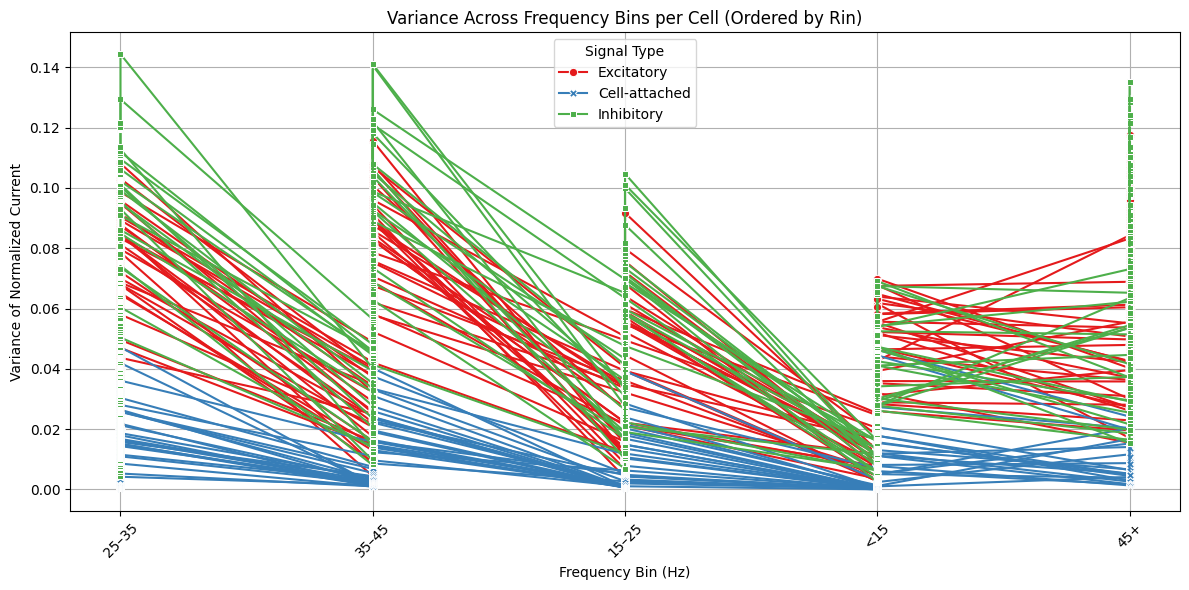

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cell_variance_by_frequency(binned_waveforms, signal_filter=None):
    """
    Plots the variance of normalized current across frequency bins for each cell,
    ordered by input resistance (Rin). Colors indicate signal type.
    
    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        signal_filter: str or None
            Optional filter for signal type ('Excitatory' or 'Inhibitory').
    """
    # Compute variance per (cell, freq_bin) pair
    var_df = calculate_variance_per_cell_instance(binned_waveforms, signal_filter=signal_filter)

    # Get a single Rin per cell (they are constant per cell)
    rin_order = var_df[['Cell', 'Rin']].drop_duplicates().sort_values('Rin')
    cell_order = rin_order['Cell'].tolist()

    # Ensure the plot uses this order
    var_df['Cell'] = pd.Categorical(var_df['Cell'], categories=cell_order, ordered=True)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=var_df, x='Freq Bin', y='Variance', hue='Signal Type', style='Signal Type',
                 markers=True, dashes=False, palette='Set1', estimator=None, units='Cell')

    plt.xticks(rotation=45)
    plt.title("Variance Across Frequency Bins per Cell (Ordered by Rin)")
    plt.xlabel("Frequency Bin (Hz)")
    plt.ylabel("Variance of Normalized Current")
    plt.grid(True)
    plt.legend(title="Signal Type")
    plt.tight_layout()
    plt.show()
plot_cell_variance_by_frequency(binwvsrinNaNs)
# or for only inhibitory signals:
# plot_cell_variance_by_frequency(binned_waveforms_new, signal_filter="Inhibitory")


/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

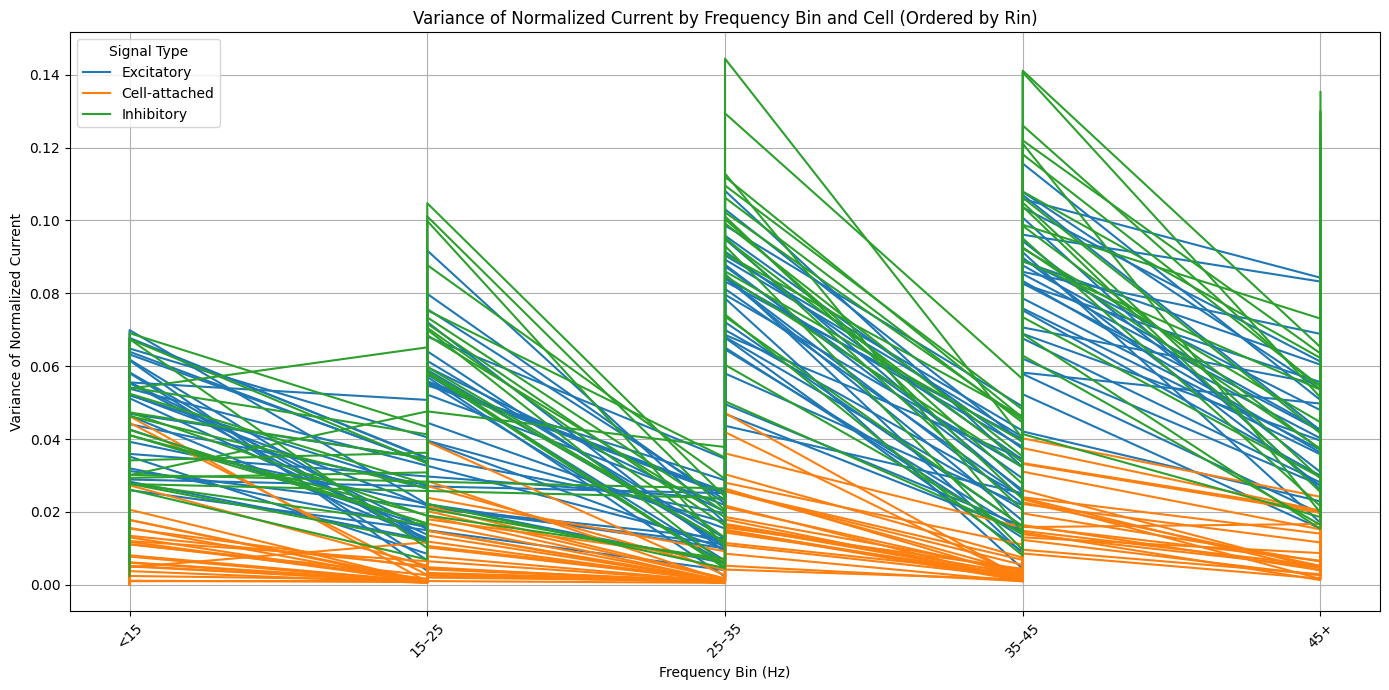

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_cell_variance_by_frequency(binned_waveforms, signal_filter=None):
    """
    Plots the variance of normalized current across frequency bins for each cell,
    ordered by input resistance (Rin). Colors indicate signal type.
    Frequency bins are ordered ascending for better visualization.
    
    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        signal_filter: str or None
            Optional filter for signal type ('Excitatory' or 'Inhibitory').
    """
    # Calculate variance per cell-frequency pair (using your existing helper)
    var_df = calculate_variance_per_cell_instance(binned_waveforms, signal_filter=signal_filter)

    # Define the frequency bins in ascending order explicitly
    freq_bin_order = ["<15", "15–25", "25–35", "35–45", "45+"]

    # Convert frequency bin column to ordered categorical
    var_df['Freq Bin'] = pd.Categorical(var_df['Freq Bin'], categories=freq_bin_order, ordered=True)

    # Sort cells by Rin ascending to order lines by physiological property
    rin_order = var_df[['Cell', 'Rin']].drop_duplicates().sort_values('Rin')
    cell_order = rin_order['Cell'].tolist()
    var_df['Cell'] = pd.Categorical(var_df['Cell'], categories=cell_order, ordered=True)

    plt.figure(figsize=(14, 7))
    
    # If filtering for one signal type, only one hue needed, else differentiate by signal type
    hue_param = 'Signal Type' if signal_filter is None else None
    
    sns.lineplot(data=var_df,
                 x='Freq Bin',
                 y='Variance',
                 hue=hue_param,
                 units='Cell',
                 estimator=None,
                 markers=True,
                 dashes=False,
                 palette='tab10')
    
    plt.xticks(rotation=45)
    plt.xlabel("Frequency Bin (Hz)")
    plt.ylabel("Variance of Normalized Current")
    plt.title("Variance of Normalized Current by Frequency Bin and Cell (Ordered by Rin)")
    plt.grid(True)
    plt.legend(title="Signal Type" if signal_filter is None else None)
    plt.tight_layout()
    plt.show()
plot_cell_variance_by_frequency(binwvsrinNaNs)


/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, unit_data in sub_data.groupby("units"):
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/haleyoro/Library/Python/3.12/lib/python/site-packages/seaborn/relational.py:313: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

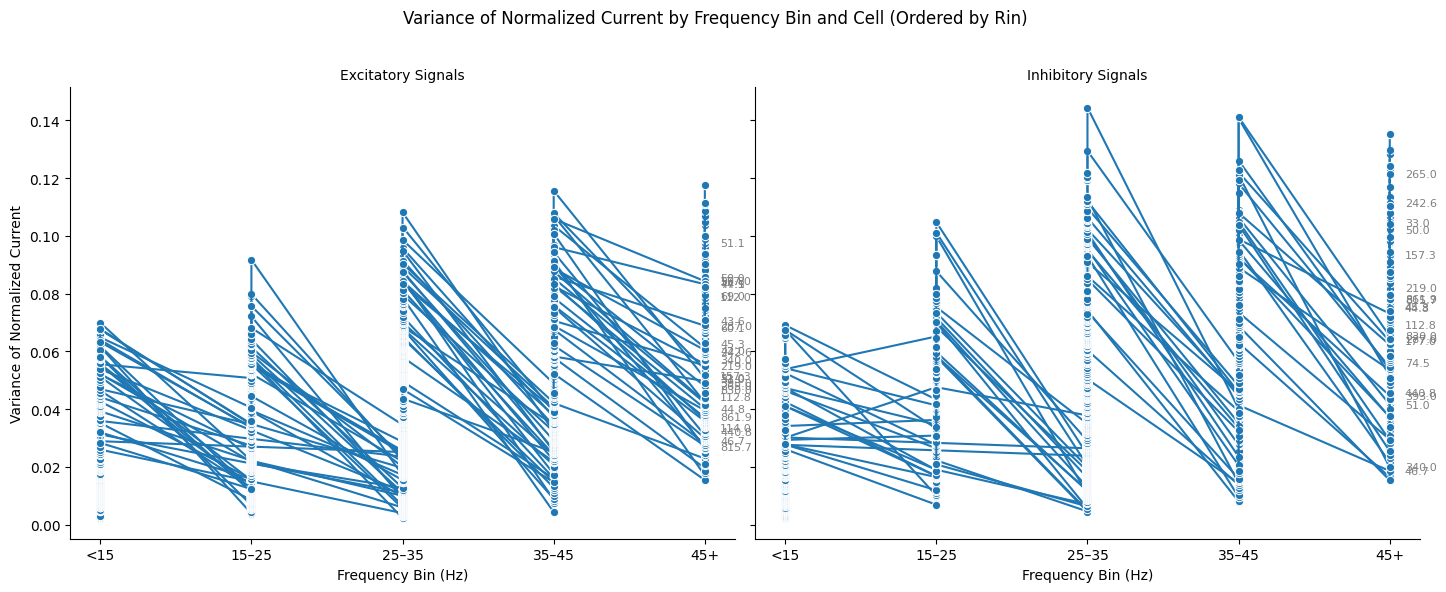

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_cell_variance_by_frequency_separate(binned_waveforms, signal_filter=None):
    """
    Plots variance of normalized current across frequency bins for each cell,
    ordered by input resistance (Rin), separated by signal type.
    Labels cells with their Rin values for interpretability.

    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        signal_filter: str or None
            Optional filter for signal type ('Excitatory' or 'Inhibitory').
    """
    # Calculate variance per cell-frequency pair
    var_df = calculate_variance_per_cell_instance(binned_waveforms, signal_filter=signal_filter)

    freq_bin_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    var_df['Freq Bin'] = pd.Categorical(var_df['Freq Bin'], categories=freq_bin_order, ordered=True)

    # Sort cells by Rin ascending
    rin_order = var_df[['Cell', 'Rin']].drop_duplicates().sort_values('Rin')
    cell_order = rin_order['Cell'].tolist()
    var_df['Cell'] = pd.Categorical(var_df['Cell'], categories=cell_order, ordered=True)

    # If signal_filter is None, plot all signal types in separate subplots,
    # else just plot filtered signal type without facets
    if signal_filter is None:
        g = sns.FacetGrid(var_df, col='Signal Type', col_order=['Excitatory', 'Inhibitory'], height=6, aspect=1.2, sharey=True)
        g.map_dataframe(sns.lineplot, x='Freq Bin', y='Variance', units='Cell', estimator=None, marker='o', dashes=False, palette='tab10')
        g.set_axis_labels("Frequency Bin (Hz)", "Variance of Normalized Current")
        g.set_titles("{col_name} Signals")
        g.set(xticks=range(len(freq_bin_order)), xticklabels=freq_bin_order)

        # Add Rin labels for each cell line on the right edge of each subplot
        for ax, signal_type in zip(g.axes.flat, ['Excitatory', 'Inhibitory']):
            subset = var_df[var_df['Signal Type'] == signal_type]
            last_bin = freq_bin_order[-1]
            for cell in cell_order:
                cell_data = subset[(subset['Cell'] == cell) & (subset['Freq Bin'] == last_bin)]
                if not cell_data.empty:
                    rin_val = cell_data['Rin'].values[0]
                    variance_val = cell_data['Variance'].values[0]
                    ax.text(len(freq_bin_order) - 1 + 0.1, variance_val, f"{rin_val:.1f}", fontsize=8, color='gray', va='center')

        plt.subplots_adjust(top=0.85)
        g.fig.suptitle("Variance of Normalized Current by Frequency Bin and Cell (Ordered by Rin)")

    else:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=var_df,
                     x='Freq Bin',
                     y='Variance',
                     units='Cell',
                     estimator=None,
                     marker='o',
                     dashes=False,
                     palette='tab10')

        plt.xlabel("Frequency Bin (Hz)")
        plt.ylabel("Variance of Normalized Current")
        plt.title(f"Variance of Normalized Current for {signal_filter} Signals by Frequency Bin and Cell (Ordered by Rin)")
        plt.xticks(rotation=45)

        # Label Rin values on the right edge of the plot
        last_bin = freq_bin_order[-1]
        subset = var_df[var_df['Signal Type'] == signal_filter]
        for cell in cell_order:
            cell_data = subset[(subset['Cell'] == cell) & (subset['Freq Bin'] == last_bin)]
            if not cell_data.empty:
                rin_val = cell_data['Rin'].values[0]
                variance_val = cell_data['Variance'].values[0]
                plt.text(len(freq_bin_order) - 1 + 0.1, variance_val, f"{rin_val:.1f}", fontsize=8, color='gray', va='center')

        plt.tight_layout()

    plt.show()
plot_cell_variance_by_frequency_separate(binwvsrinNaNs)


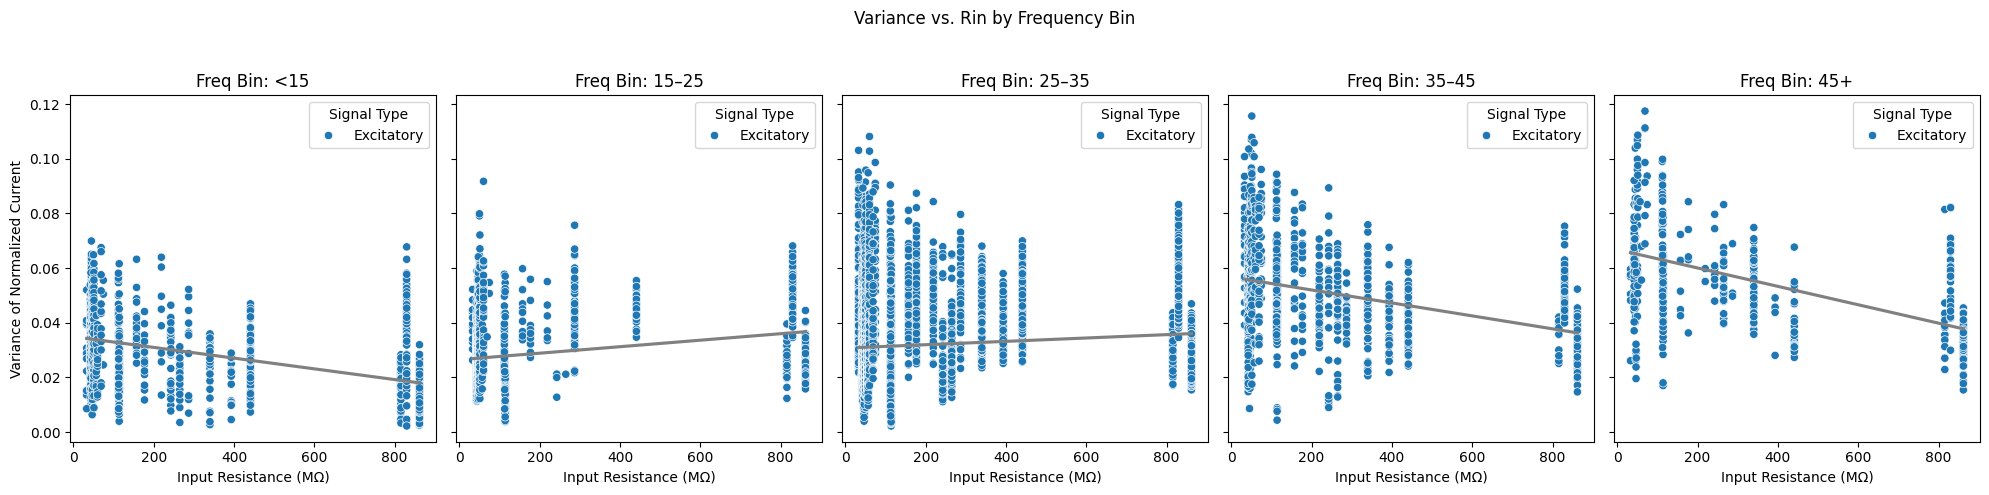

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_variance_vs_rin_by_freqbin(binned_waveforms, signal_filter=None):
    """
    Plots variance of normalized current vs. Rin for each frequency bin,
    separated by signal type.
    
    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        signal_filter: str or None
            Optional filter for signal type ('Excitatory' or 'Inhibitory').
    """
    # Calculate variance per cell-frequency pair
    var_df = calculate_variance_per_cell_instance(binned_waveforms, signal_filter=signal_filter)

    freq_bin_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    var_df['Freq Bin'] = pd.Categorical(var_df['Freq Bin'], categories=freq_bin_order, ordered=True)

    if signal_filter:
        var_df = var_df[var_df['Signal Type'] == signal_filter]

    # Set up plot
    num_bins = len(freq_bin_order)
    fig, axes = plt.subplots(1, num_bins, figsize=(4 * num_bins, 5), sharey=True)

    for i, freq_bin in enumerate(freq_bin_order):
        ax = axes[i]
        df_bin = var_df[var_df['Freq Bin'] == freq_bin]
        if df_bin.empty:
            continue

        sns.scatterplot(data=df_bin, x='Rin', y='Variance', hue='Signal Type', ax=ax)
        sns.regplot(data=df_bin, x='Rin', y='Variance', scatter=False, ci=None, ax=ax, color='gray')
        ax.set_title(f"Freq Bin: {freq_bin}")
        ax.set_xlabel("Input Resistance (MΩ)")
        if i == 0:
            ax.set_ylabel("Variance of Normalized Current")
        else:
            ax.set_ylabel("")

    plt.suptitle("Variance vs. Rin by Frequency Bin")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
plot_variance_vs_rin_by_freqbin(binwvsrinNaNs,signal_filter="Excitatory")


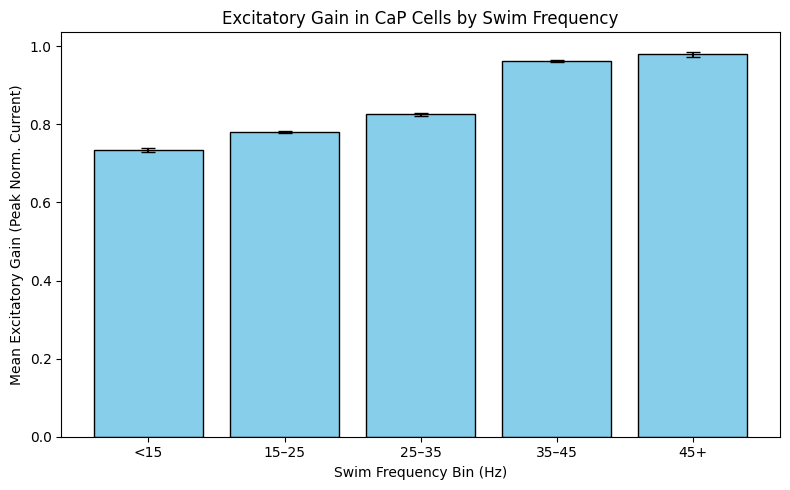

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def compute_excitatory_gain_variability(binned_waveforms, target_cell_type='CaP'):
    """
    Compute excitatory gain and variability across frequency bins for one cell type.
    
    Gain is defined as the peak normalized current per waveform.
    Variability is standard deviation across waveforms in a frequency bin.
    
    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
        target_cell_type: str
            The cell type to analyze (e.g. 'CaP', 'MiP', 'iSMN')
    
    Returns:
        DataFrame with frequency bin, mean gain, and std gain
    """
    data = defaultdict(list)

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        if group_iSMN(cell_type) != group_iSMN(target_cell_type):
            continue
        if group_EI(signal_type) != 'Excitatory':
            continue
        if df.shape != (50, 4):
            continue

        # Determine frequency bin label
        freq_bin = get_freq_bin(freq)
        
        # Calculate gain (peak normalized current)
        gain = df['Normalized Current'].max()
        data[freq_bin].append(gain)

    # Aggregate
    results = []
    for freq_bin, gains in data.items():
        if not gains:
            continue
        results.append({
            'Freq Bin': freq_bin,
            'Mean Gain': np.mean(gains),
            'Gain Std': np.std(gains),
            'Gain SEM': np.std(gains) / np.sqrt(len(gains)),
            'N': len(gains)
        })

    return pd.DataFrame(results)
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_excitatory_gain_and_variance(gain_df, title="Excitatory Gain and Variance by Frequency Bin"):
    freq_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    gain_df['Freq Bin'] = pd.Categorical(gain_df['Freq Bin'], categories=freq_order, ordered=True)
    gain_df = gain_df.sort_values('Freq Bin')

    x_labels = gain_df['Freq Bin'].tolist()
    means = gain_df['Mean Gain'].values
    errors = gain_df['Gain SEM'].values
    variances = gain_df['Gain Variance'].values  # Make sure you compute and include this in gain_df

    x_pos = np.arange(len(x_labels))

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Bar plot for mean gain + SEM on left y-axis
    bars = ax1.bar(x_pos, means, yerr=errors, capsize=5, color='skyblue', edgecolor='black', label='Mean Gain ± SEM')
    ax1.set_xlabel("Swim Frequency Bin (Hz)")
    ax1.set_ylabel("Mean Excitatory Gain (Peak Norm. Current)")
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(x_labels)
    ax1.set_title(title)

    # Secondary y-axis for variance
    ax2 = ax1.twinx()
    ax2.plot(x_pos, variances, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Gain Variance')
    ax2.set_ylabel("Gain Variance")

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

gain_df = compute_excitatory_gain_variability(binwvsrinNaNs, target_cell_type="CaP")
plot_excitatory_gain_by_bin(gain_df, title="Excitatory Gain in CaP Cells by Swim Frequency")


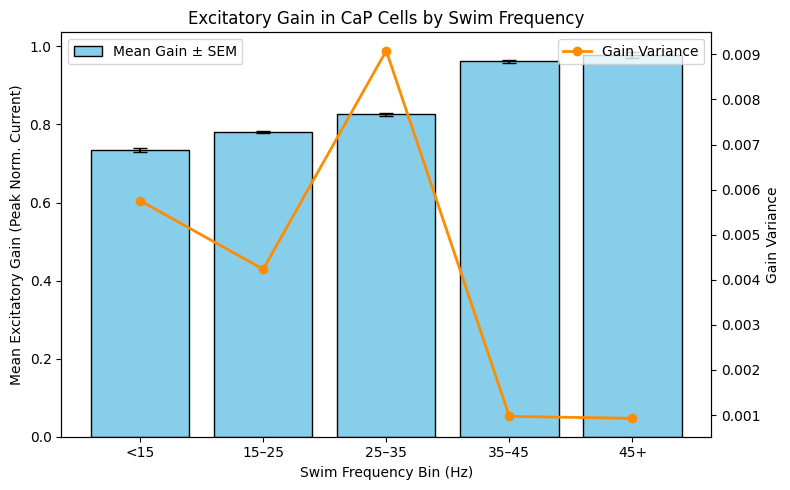

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_excitatory_gain_and_variance(gain_df, title="Excitatory Gain and Variance by Frequency Bin"):
    freq_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    gain_df['Freq Bin'] = pd.Categorical(gain_df['Freq Bin'], categories=freq_order, ordered=True)
    gain_df = gain_df.sort_values('Freq Bin')

    x_labels = gain_df['Freq Bin'].tolist()
    means = gain_df['Mean Gain'].values
    errors = gain_df['Gain SEM'].values
    variances = gain_df['Gain Variance'].values  # Make sure you compute and include this in gain_df

    x_pos = np.arange(len(x_labels))

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Bar plot for mean gain + SEM on left y-axis
    bars = ax1.bar(x_pos, means, yerr=errors, capsize=5, color='skyblue', edgecolor='black', label='Mean Gain ± SEM')
    ax1.set_xlabel("Swim Frequency Bin (Hz)")
    ax1.set_ylabel("Mean Excitatory Gain (Peak Norm. Current)")
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(x_labels)
    ax1.set_title(title)

    # Secondary y-axis for variance
    ax2 = ax1.twinx()
    ax2.plot(x_pos, variances, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Gain Variance')
    ax2.set_ylabel("Gain Variance")

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

def compute_excitatory_gain_variability(binned_waveforms, target_cell_type='CaP'):
    """
    Compute excitatory gain and variability across frequency bins for one cell type.
    
    Gain is defined as the peak normalized current per waveform.
    Variability is standard deviation across waveforms in a frequency bin.
    
    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
        target_cell_type: str
            The cell type to analyze (e.g. 'CaP', 'MiP', 'iSMN')
    
    Returns:
        DataFrame with frequency bin, mean gain, std gain, SEM, variance
    """
    data = defaultdict(list)

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        if group_iSMN(cell_type) != group_iSMN(target_cell_type):
            continue
        if group_EI(signal_type) != 'Excitatory':
            continue
        if df.shape != (50, 4):
            continue

        freq_bin = get_freq_bin(freq)
        gain = df['Normalized Current'].max()
        data[freq_bin].append(gain)

    results = []
    for freq_bin, gains in data.items():
        if not gains:
            continue
        gains_arr = np.array(gains)
        results.append({
            'Freq Bin': freq_bin,
            'Mean Gain': gains_arr.mean(),
            'Gain Std': gains_arr.std(ddof=1),
            'Gain SEM': gains_arr.std(ddof=1) / np.sqrt(len(gains_arr)),
            'Gain Variance': gains_arr.var(ddof=1),
            'N': len(gains_arr)
        })

    return pd.DataFrame(results)

gain_df = compute_excitatory_gain_variability(binwvsrinNaNs, target_cell_type="CaP")
plot_excitatory_gain_and_variance(gain_df, title="Excitatory peak in CaP Cells by Swim Frequency")

/var/folders/40/qf3btjqs32l1pmzzyts7w9pmh2xrdg/T/ipykernel_70263/2118399782.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain_df, x='Freq Bin', y='Mean Gain', capsize=0.2, palette="Blues")


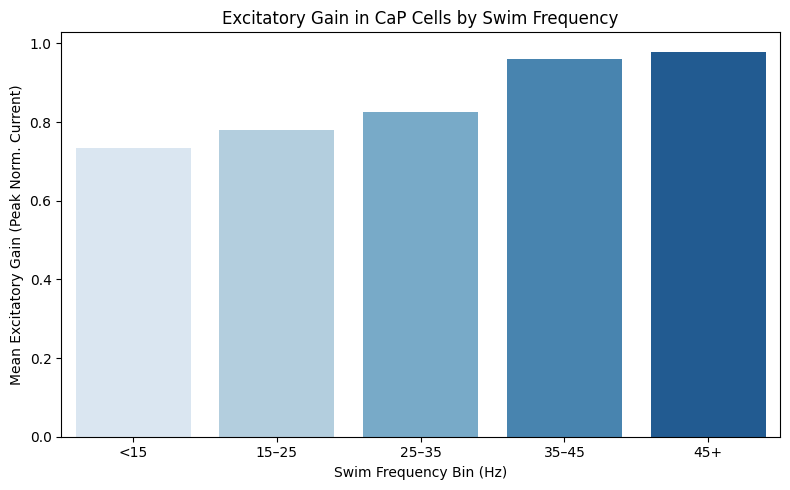

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def compute_excitatory_gain_variability(binned_waveforms, target_cell_type='CaP'):
    """
    Compute excitatory gain and variability across frequency bins for one cell type.
    
    Gain is defined as the peak normalized current per waveform.
    Variability is standard deviation across waveforms in a frequency bin.
    
    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
        target_cell_type: str
            The cell type to analyze (e.g. 'CaP', 'MiP', 'iSMN')
    
    Returns:
        DataFrame with frequency bin, mean gain, and std gain
    """
    data = defaultdict(list)

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        if group_iSMN(cell_type) != group_iSMN(target_cell_type):
            continue
        if group_EI(signal_type) != 'Excitatory':
            continue
        if df.shape != (50, 4):
            continue

        # Determine frequency bin label
        freq_bin = get_freq_bin(freq)
        
        # Calculate gain (peak normalized current)
        gain = df['Normalized Current'].max()
        data[freq_bin].append(gain)

    # Aggregate
    results = []
    for freq_bin, gains in data.items():
        if not gains:
            continue
        results.append({
            'Freq Bin': freq_bin,
            'Mean Gain': np.mean(gains),
            'Gain Std': np.std(gains),
            'Gain SEM': np.std(gains) / np.sqrt(len(gains)),
            'N': len(gains)
        })

    return pd.DataFrame(results)
def plot_excitatory_gain_by_bin(gain_df, title="Excitatory Gain by Frequency Bin"):
    freq_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    gain_df['Freq Bin'] = pd.Categorical(gain_df['Freq Bin'], categories=freq_order, ordered=True)
    gain_df = gain_df.sort_values('Freq Bin')

    plt.figure(figsize=(8, 5))
    sns.barplot(data=gain_df, x='Freq Bin', y='Mean Gain', capsize=0.2, palette="Blues")
    plt.ylabel("Mean Excitatory Gain (Peak Norm. Current)")
    plt.xlabel("Swim Frequency Bin (Hz)")
    plt.title(title)
    plt.tight_layout()
    plt.show()
gain_df = compute_excitatory_gain_variability(binwvsrinNaNs, target_cell_type="CaP")
plot_excitatory_gain_by_bin(gain_df, title="Excitatory Gain in CaP Cells by Swim Frequency")


In [44]:
celltypes = cell_types_df["Cell Type"].unique()

In [45]:
celltypes[:-1]

array(['CaP', 'vRoP', 'MiP', ..., 'dSMN', 'vSMN ', 'iSMN'],
      shape=(9,), dtype=object)

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

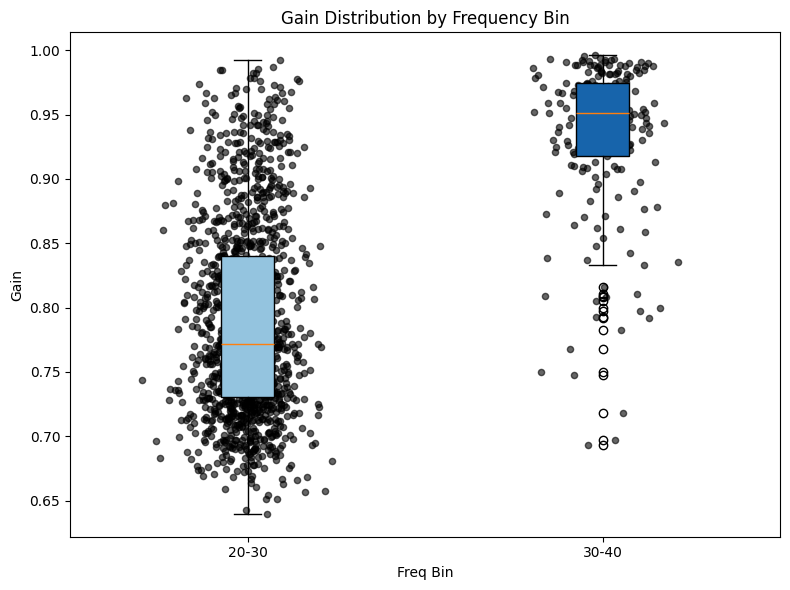

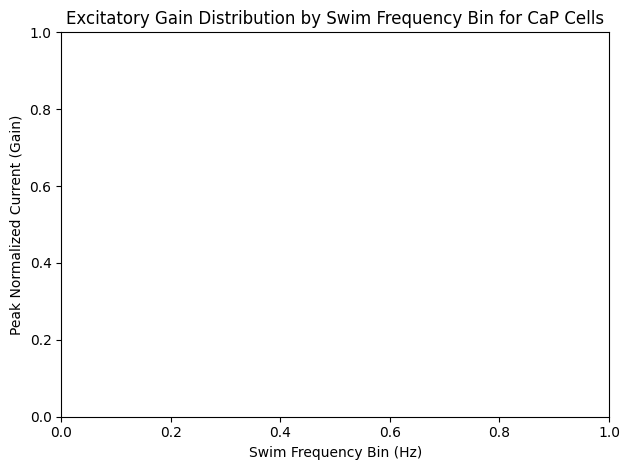

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

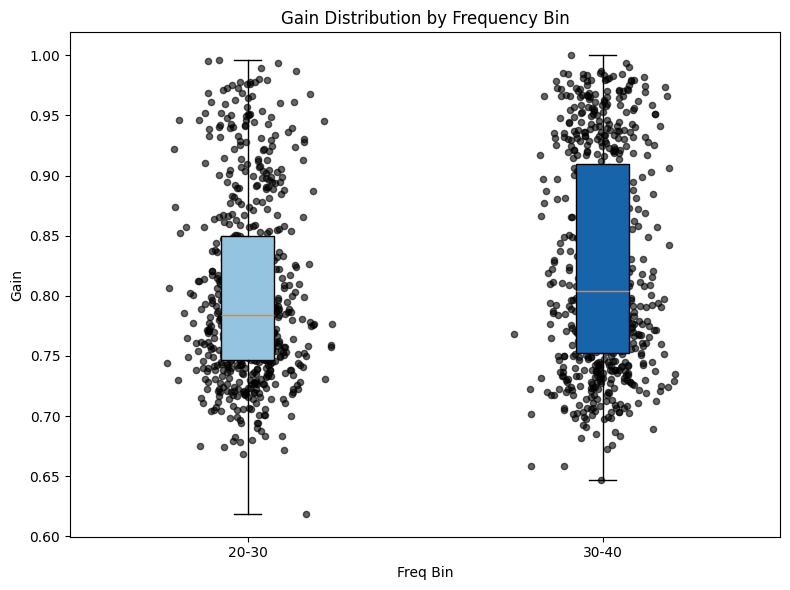

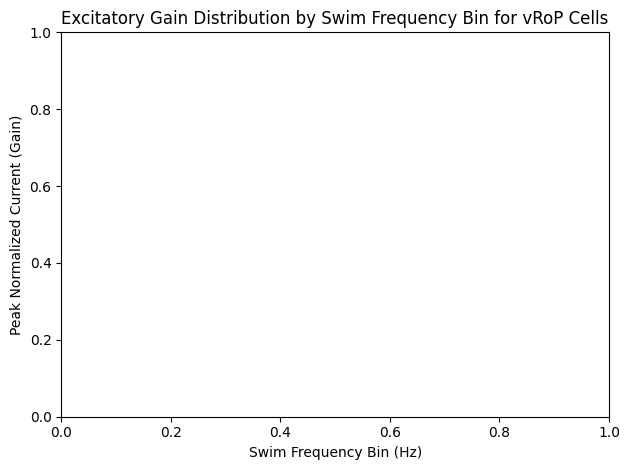

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

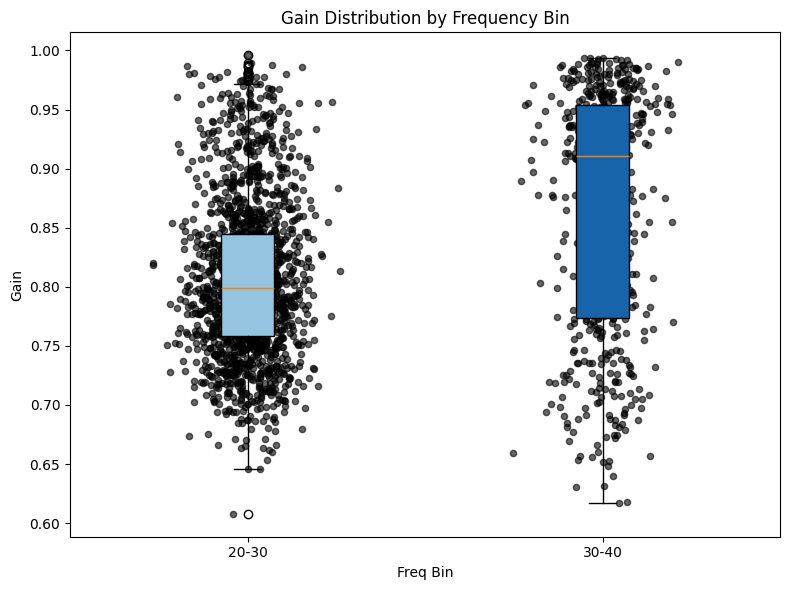

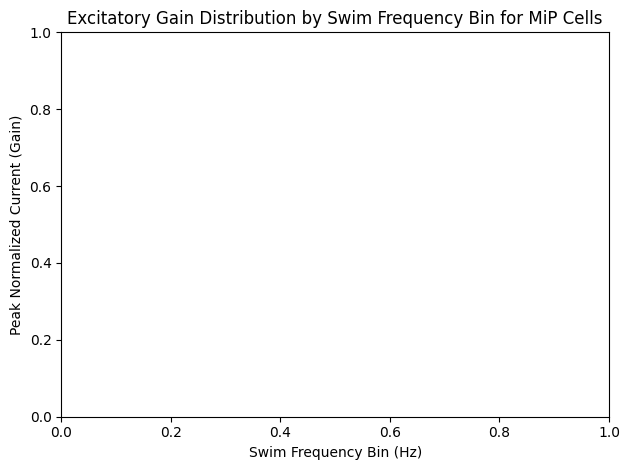

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

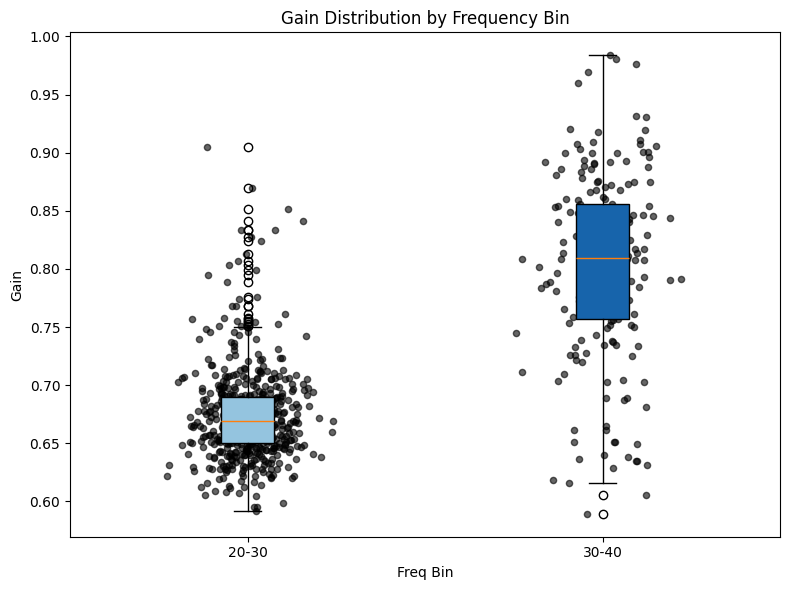

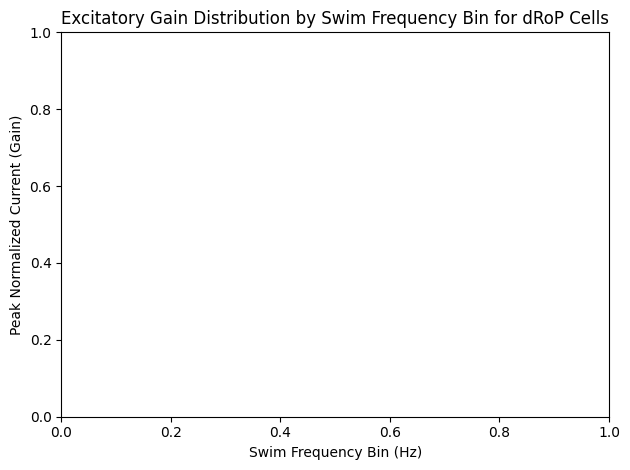

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

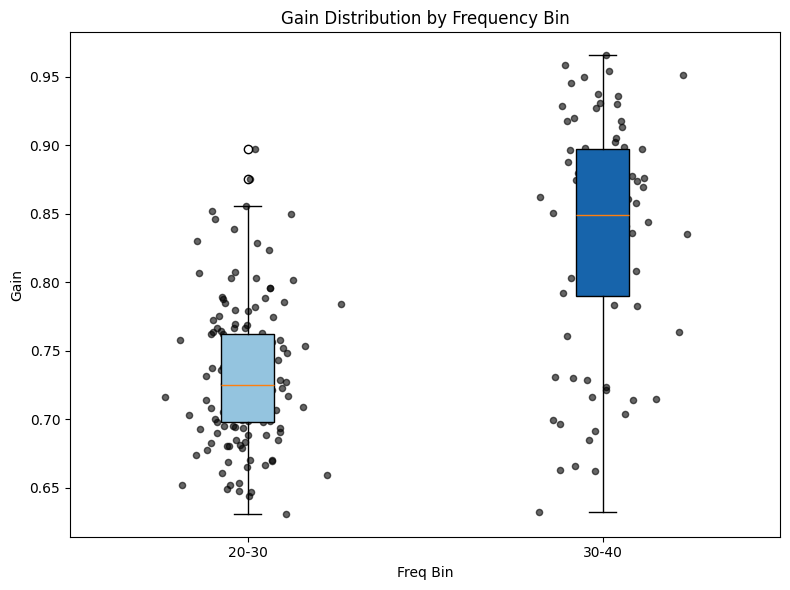

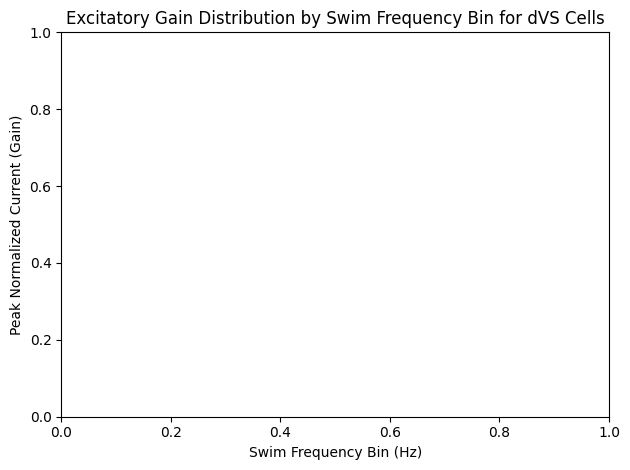

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

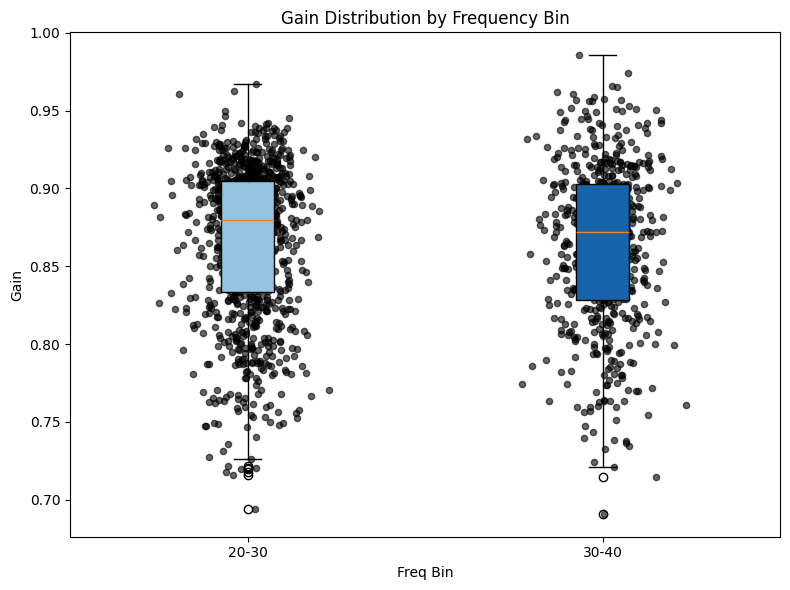

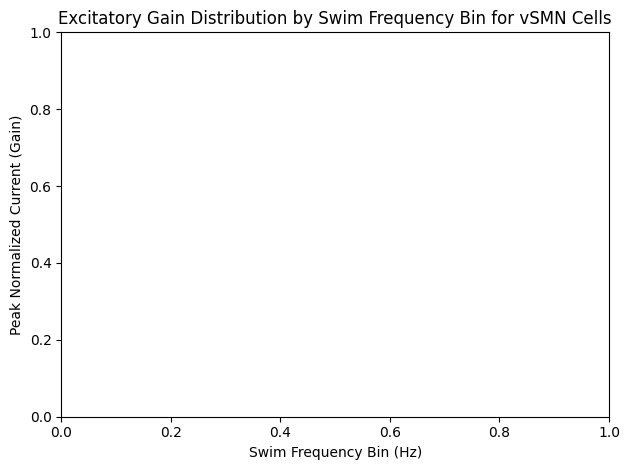

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

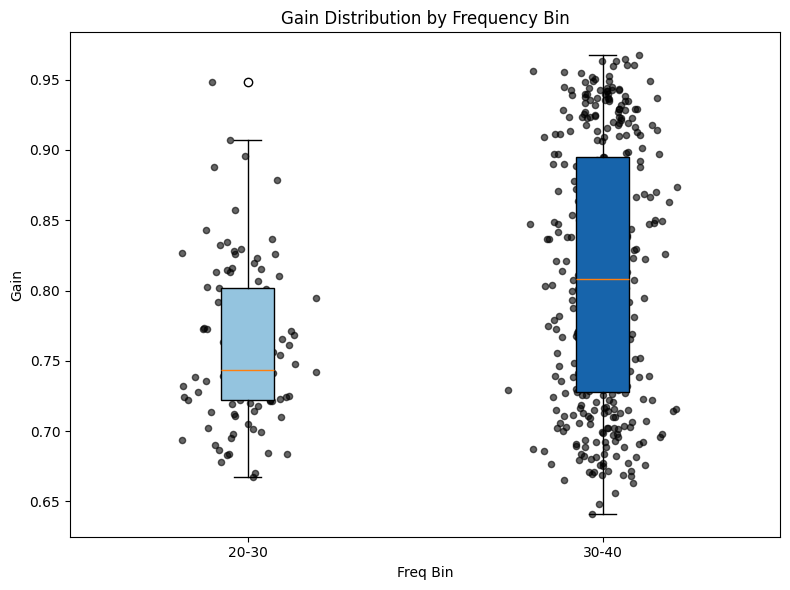

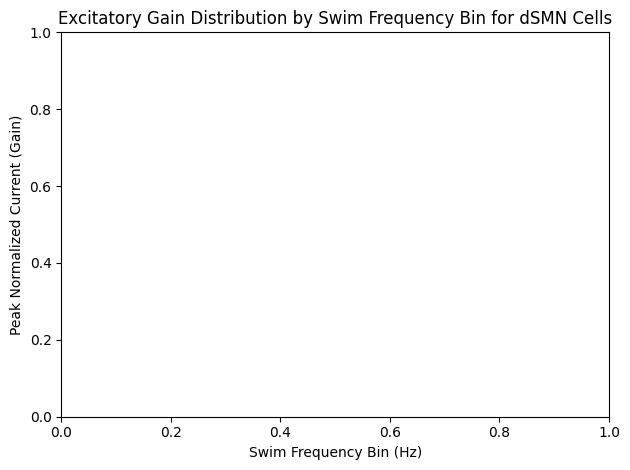

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

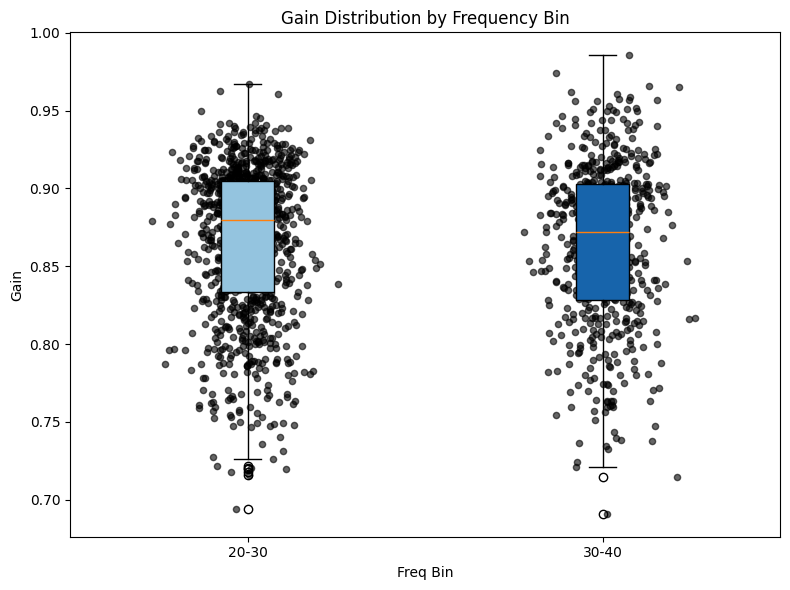

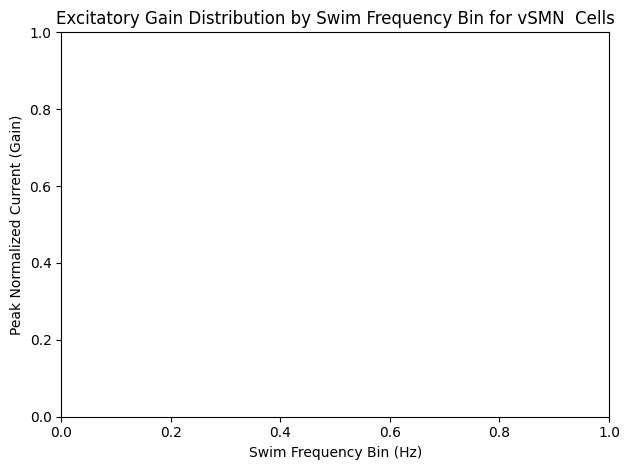

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

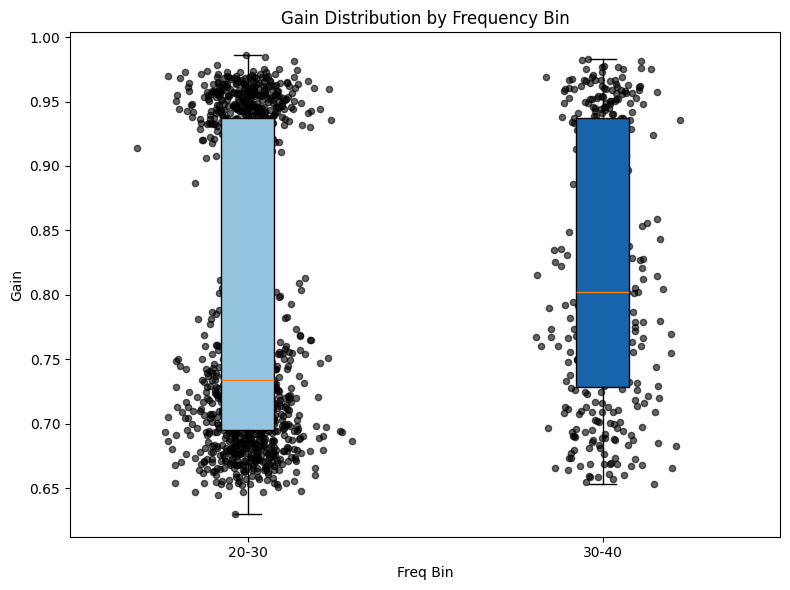

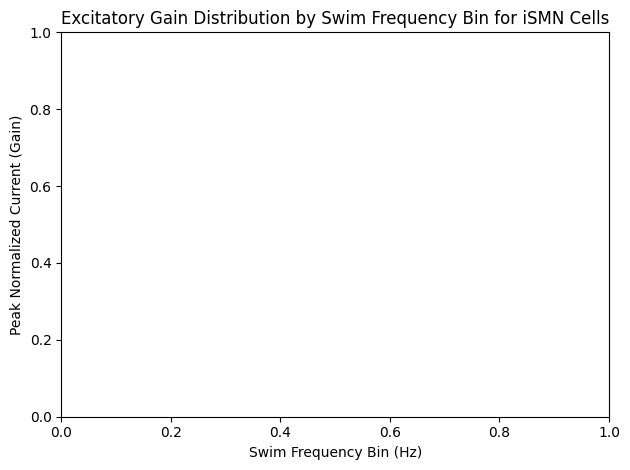

In [57]:

for cell in celltypes[:-1]:
    plot_excitatory_gain_boxplot(binwvsrinNaNs, cell)

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df_plot.groupby('Freq Bin')
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29920/4261199818.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, patch_artist=True, labels=labels)


<Figure size 1000x600 with 0 Axes>

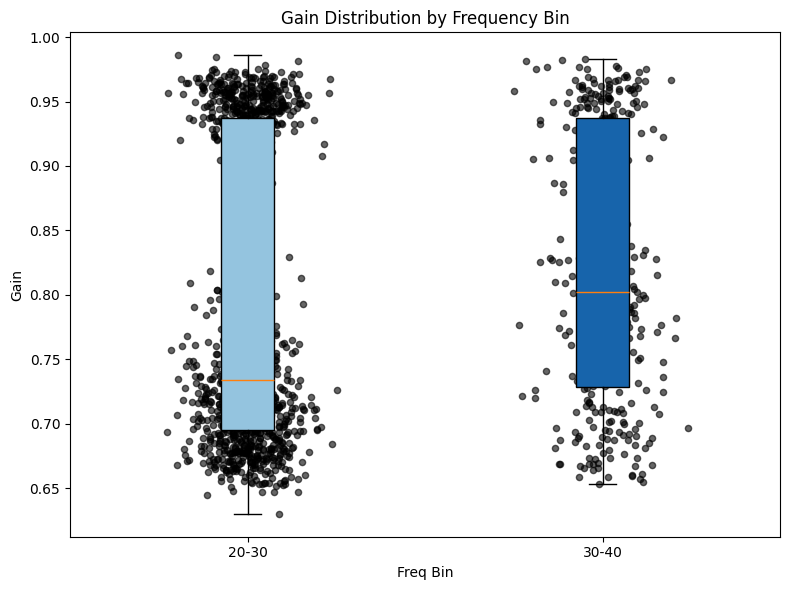

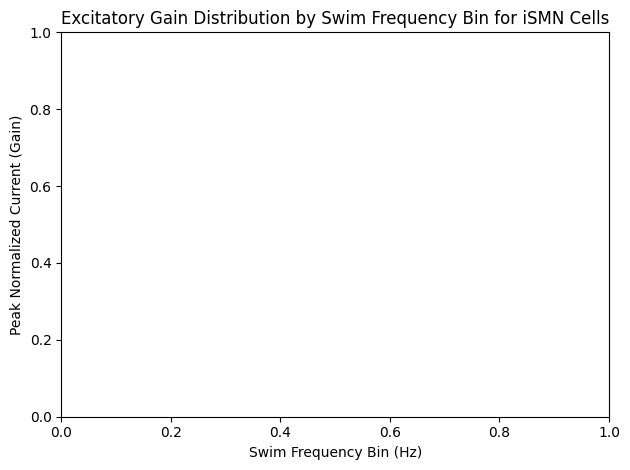

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def compute_excitatory_gain_variability2(binned_waveforms, target_cell_type='CaP'):
    """
    Compute excitatory gain and variability across frequency bins for one cell type.
    
    Gain is defined as the peak normalized current per waveform.
    Variability is standard deviation across waveforms in a frequency bin.
    
    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
        target_cell_type: str
            The cell type to analyze (e.g. 'CaP', 'MiP', 'iSMN')
    
    Returns:
        DataFrame with frequency bin, mean gain, and std gain
    """
    data = defaultdict(list)

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        if cell_id != target_cell_type:
            continue
        if group_EI(signal_type) != 'Excitatory':
            continue
        if df.shape != (50, 4):
            continue

        # Determine frequency bin label
        freq_bin = get_slowfast(freq)
        
        # Calculate gain (peak normalized current)
        gain = df['Normalized Current'].max()
        data[freq_bin].append(gain)

    # Aggregate
    results = []
    for freq_bin, gains in data.items():
        if not gains:
            continue
        results.append({
            'Freq Bin': freq_bin,
            'Mean Gain': np.mean(gains),
            'Gain Std': np.std(gains),
            'Gain SEM': np.std(gains) / np.sqrt(len(gains)),
            'N': len(gains)
        })

    return pd.DataFrame(results)
def plot_excitatory_gain_by_bin(gain_df, title="Excitatory Gain by Frequency Bin"):
    # freq_order = ["<15", "15–25", "25–35", "35–45", "45+"]
    gain_df['Freq Bin'] = pd.Categorical(gain_df['Freq Bin'], categories=freq_order, ordered=True)
    gain_df = gain_df.sort_values('Freq Bin')

    plt.figure(figsize=(8, 5))
    sns.barplot(data=gain_df, x='Freq Bin', y='Mean Gain', capsize=0.2, palette="Blues")
    plt.ylabel("Mean Excitatory Gain (Peak Norm. Current)")
    plt.xlabel("Swim Frequency Bin (Hz)")
    plt.title(title)
    plt.tight_layout()
    plt.show()
gain_df = compute_excitatory_gain_variability2(binwvsrinNaNs, sheets_types[0])
plot_excitatory_gain_boxplot(binwvsrinNaNs, cell)

In [56]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

def plot_excitatory_gain_boxplot(binned_waveforms, target_cell_type='CaP'):
    """
    Plot a boxplot of excitatory gain (peak normalized current) across swim frequency bins
    for a given cell type.

    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
        target_cell_type: str
            Cell type to analyze (e.g., 'CaP', 'MiP', 'iSMN')
    """
    data = []

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        if group_iSMN(cell_type) != group_iSMN(target_cell_type):
            continue
        if group_EI(signal_type) != 'Excitatory':
            continue
        if df.shape != (50, 4):
            continue

        freq_bin = get_slowfast(freq)
        gain = df['Normalized Current'].max()

        data.append({
            'Freq Bin': freq_bin,
            'Gain': gain,
            'Cell ID': cell_id
        })

    df_plot = pd.DataFrame(data)

    # Optional: order your frequency bins for the x-axis
    freq_bin_order = ["20-30", "30-40"]
    df_plot['Freq Bin'] = pd.Categorical(df_plot['Freq Bin'], categories=freq_bin_order, ordered=True)

    plt.figure(figsize=(10, 6))
    # sns.boxplot(data=df_plot, x='Freq Bin', y='Gain', palette="Blues")
    # sns.stripplot(data=df_plot, x='Freq Bin', y='Gain', color='black', size=4, jitter=True, alpha=0.6)


    # Example: Assuming your DataFrame is called df_plot and has 'Freq Bin' and 'Gain' columns
    # Group data by 'Freq Bin'
    groups = df_plot.groupby('Freq Bin')

    # Prepare data for boxplot
    data = [group['Gain'].values for name, group in groups]
    labels = [name for name, group in groups]

    # Create boxplot
    fig, ax = plt.subplots(figsize=(8, 6))
    box = ax.boxplot(data, patch_artist=True, labels=labels)

    # Color the boxes (Blues palette)
    colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(data)))
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Add scatter (strip) plot
    for i, group in enumerate(data):
        # Add jitter to x values
        x = np.random.normal(i + 1, 0.08, size=len(group))
        ax.scatter(x, group, color='black', s=20, alpha=0.6)

    # Customize plot
    ax.set_xlabel('Freq Bin')
    ax.set_ylabel('Gain')
    ax.set_title('Gain Distribution by Frequency Bin')
    plt.tight_layout()
    plt.show()


    plt.title(f"Excitatory Gain Distribution by Swim Frequency Bin for {target_cell_type} Cells")
    plt.ylabel("Peak Normalized Current (Gain)")
    plt.xlabel("Swim Frequency Bin (Hz)")
    plt.tight_layout()
    plt.show()


In [49]:
# parent_folder_path = "/Users/haleyoro/Desktop/" # work on library computer
parent_folder_path = "/Users/Haley/Desktop/" # work on local computer

In [55]:
!pip install seaborn

Python(68504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/Haley/Desktop/murray-neuroscience-lab/.venv/bin/pip: line 2: /Users/Haley/Desktop/Neuroscience Lab/Repository/murray-neuroscience-lab/.venv/bin/python: No such file or directory
/Users/Haley/Desktop/murray-neuroscience-lab/.venv/bin/pip: line 2: exec: /Users/Haley/Desktop/Neuroscience Lab/Repository/murray-neuroscience-lab/.venv/bin/python: cannot execute: No such file or directory


In [50]:
cell_types_df = pd.read_csv(parent_folder_path+"murray-neuroscience-lab/Excel processor/List of cells.csv")
cell_types_df = cell_types_df.dropna(how='all')
cell_types_df = cell_types_df.iloc[:,:4]
cell_types_df.reset_index(drop=True,inplace=True)
sheets_types = cell_types_df["Cell"].unique().tolist()

In [27]:
sheets_types

['2013_03_21_cell5',
 '2013_03_22_cell6',
 '2013_03_22_cell2',
 '2012_08_31_cell2',
 '2012_08_31_cell1',
 '2012_08_31_cell3',
 '2013_03_21_cell4',
 '2012_08_01_cell3',
 '2013_03_22_cell1',
 '2013_03_20_cell1',
 '2013_03_21_cell1',
 '2013_03_21_cell3',
 '2013_03_22_cell3',
 '2012_04_25_cell1',
 '2012_12_06_cell1',
 '2013_03_22_cell4',
 '2012_04_25_cell3',
 '2013_03_22_cell5',
 '2012_06_29',
 '2012_08_07',
 '2012_08_31_cell4',
 '2012_12_05_cell1',
 '2012_08_01_cell1',
 '2012_10_04_cell2',
 '2012_12_04_cell1',
 '2012_12_05_cell4',
 '2012_12_05_cell3',
 '2012_12_03_cell1',
 '2012_12_06_cell4']

In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np

# Grouping for signal types only (you want to filter by exact cell name)
def group_EI(signal_type):
    if signal_type in ["Inhibitory", "Inhibitory (Rs compensation)"]:
        return "Inhibitory"
    if signal_type in ["Excitatory", "Excitatory (Rs compensation)"]:
        return "Excitatory"
    return signal_type

def plot_variability_across_frequencies_scatter(binned_waveforms, cell_to_plot, signal_filter=None):
    """
    Plot variance of normalized current across swim frequencies for one specific cell as a scatter plot.
    
    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        cell_to_plot: str
            Exact cell name to filter on (e.g., "cell_123").
        signal_filter: str or None
            If specified, filter by 'Excitatory' or 'Inhibitory' signals only.
    """
    records = []
    max_frequency = 50
    
    for key, df in binned_waveforms.items():
        freq, signal_type_raw, cell_type, cell, Rin = key
        
        # Filter by exact cell name
        if cell != cell_to_plot:
            continue
        
        # Frequency filter
        if freq > max_frequency or freq < 10:
            continue
        
        # Group signal type for filtering & color
        signal_type = group_EI(signal_type_raw)
        
        if signal_filter is not None and signal_type != signal_filter:
            continue
        
        if df is None or df.empty:
            continue
        
        variance = np.var(df['Normalized Current'].values)
        
        records.append({
            'Frequency': freq,
            'Signal Type': signal_type,
            'Cell': cell,
            'Rin': Rin,
            'Variance': variance
        })
    
    if len(records) == 0:
        print(f"No data found for cell '{cell_to_plot}' with filter '{signal_filter}'")
        return
    
    var_df = pd.DataFrame(records)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=var_df,
                    x='Frequency',
                    y='Variance',
                    hue='Signal Type',
                    style='Signal Type',
                    palette='Set1',
                    s=100)
    
    plt.title(f"Variance of Normalized Current Across Swim Frequencies for Cell {cell_to_plot}")
    plt.xlabel("Swim Frequency (Hz)")
    plt.ylabel("Variance of Normalized Current")
    plt.grid(True)
    plt.legend(title='Signal Type')
    plt.tight_layout()
    plt.show()


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_variability_across_frequencies(binned_waveforms, cell_to_plot, signal_filter=None):
    """
    Plot variance of normalized current across swim frequencies for one specific cell.
    
    Parameters:
        binned_waveforms: dict
            Keys are (freq, signal_type, cell_type, cell, Rin)
            Values are DataFrames of waveform data.
        cell_to_plot: str
            The name of the specific cell to plot (e.g., "2013_03_21_cell5").
        signal_filter: str or None
            If specified, filter by 'Excitatory' or 'Inhibitory' signals only.
    """
    records = []
    max_frequency = 50

    for key, df in binned_waveforms.items():
        freq, signal_type, cell_type, cell, Rin = key

        if freq > max_frequency or freq < 10:
            continue
        if cell != cell_to_plot:
            continue
        if signal_filter is not None and signal_type != signal_filter:
            continue
        if df is None or df.empty:
            continue

        variance = np.var(df['Normalized Current'].values)
        records.append({
            'Frequency': freq,
            'Signal Type': signal_type,
            'Cell': cell,
            'Rin': Rin,
            'Variance': variance
        })

    if len(records) == 0:
        print(f"No data found for cell '{cell_to_plot}' with filter '{signal_filter}'")
        return

    var_df = pd.DataFrame(records)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=var_df,
                    x='Frequency',
                    y='Variance',
                    hue='Signal Type',
                    style='Signal Type',
                    palette='Set1',
                    s=100)

    plt.title(f"Variance of Normalized Current Across Swim Frequencies for Cell {cell_to_plot}")
    plt.xlabel("Swim Frequency (Hz)")
    plt.ylabel("Variance of Normalized Current")
    plt.grid(True)
    plt.legend(title='Signal Type')
    plt.tight_layout()
    plt.show()
plot_variability_across_frequencies(binwvsrinNaNs,'2013_03_21_cell5')

NameError: name 'binwvsrinNaNs' is not defined

In [34]:
for sheet in sheets_types:
    plot_variability_across_frequencies(binwvsrinNaNs,sheet)

NameError: name 'sheets_types' is not defined